# Importing Libraries

In [110]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score


import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [65]:
# setting maximum columns and maximum rows

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading Datasets

In [66]:
X = pd.read_csv("datasets/X_balanced.csv")
Y = pd.read_csv("datasets/y_balanced.csv")

y =Y["TenYearCHD"]

In [67]:
X.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1,39,4.0,0.000000,0.0,0,0,0,5.273000,4.663439,3.294725,4.382027,4.343805
1,0,46,2.0,0.000000,0.0,0,0,0,5.521461,4.795791,3.357942,4.553877,4.330733
2,1,48,1.0,4.472136,0.0,0,0,0,5.501258,4.848116,3.232384,4.317488,4.248495
3,0,61,3.0,5.477226,0.0,0,1,0,5.416100,5.010635,3.352707,4.174387,4.634729
4,0,46,3.0,4.795832,0.0,0,0,0,5.652489,4.867534,3.139833,4.442651,4.442651


# Spliting the dataset

In [68]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
X_train.shape, X_test.shape


((5394, 13), (1798, 13))

# Feature Scalling

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.87368264, -1.2202508 , -0.86863985, ...,  0.65394032,
         0.68593136, -0.05368316],
       [ 1.14458038,  1.22119915, -0.86863985, ...,  1.3524559 ,
         0.06082565, -0.8686167 ],
       [ 1.14458038, -0.29017463,  2.13077137, ...,  0.39096048,
         0.8979414 ,  0.1823168 ],
       ...,
       [ 1.14458038, -1.45276984,  1.13096763, ..., -0.34536355,
        -0.48345143,  0.00672759],
       [-0.87368264,  0.63990154, -0.86863985, ..., -0.40245646,
        -0.00983082,  0.00672759],
       [-0.87368264, -1.33651032,  0.13116389, ...,  0.22479944,
        -0.00983082, -0.49897474]])

# KNN Classifier

In [70]:
classifier= KNeighborsClassifier()  
classifier.fit(X_train_scaled, y_train)
y_pred= classifier.predict(X_test_scaled) 


In [71]:
# Model evaluation
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

print("Accuracy: ", knn_acc)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)

Accuracy:  0.7547274749721913
Precision:  0.7122040072859745
Recall:  0.8621830209481808
F1 Score:  0.7800498753117209


Text(0.5, 1.0, 'confusion_matrix for KNN')

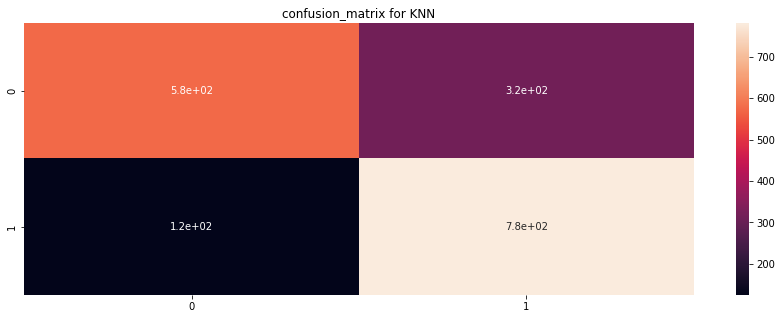

In [72]:
# let's visualize the confusion matrix:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

plt.title("confusion_matrix for KNN")


# Random Forest

In [73]:
classifier = RandomForestClassifier()  
classifier.fit(X_train_scaled, y_train)
y_pred= classifier.predict(X_test_scaled)

In [74]:
# Model evaluation
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

print("Accuracy: ", rf_acc)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)

Accuracy:  0.8681868743047831
Precision:  0.8641304347826086
Recall:  0.87651598676957
F1 Score:  0.870279146141215


Text(0.5, 1.0, 'confusion_matrix for RF')

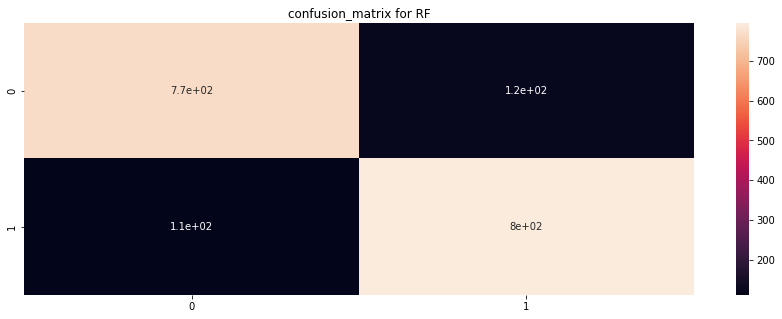

In [75]:
# let's visualize the confusion matrix:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

plt.title("confusion_matrix for RF")


# SVM

In [76]:
classifier= SVC()  
classifier.fit(X_train_scaled, y_train)
y_pred= classifier.predict(X_test_scaled) 


In [77]:
# Model evaluation
svc_acc = accuracy_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)

print("Accuracy: ", svc_acc)
print("Precision: ", svc_precision)
print("Recall: ", svc_recall)
print("F1 Score: ", svc_f1)

Accuracy:  0.7313681868743048
Precision:  0.7304347826086957
Recall:  0.74090407938258
F1 Score:  0.735632183908046


Text(0.5, 1.0, 'confusion_matrix for SVM')

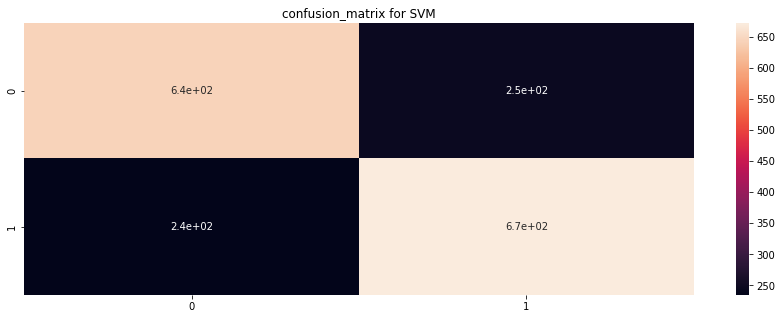

In [78]:
# let's visualize the confusion matrix:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

plt.title("confusion_matrix for SVM")


# Hyper Parameter Tunning

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


     

In [80]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)

final_model = rf_random.best_estimator_
y_pred = final_model.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [81]:
# Model evaluation
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

print("Accuracy: ", rf_acc)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)

Accuracy:  0.8832035595105673
Precision:  0.8825466520307355
Recall:  0.886438809261301
F1 Score:  0.8844884488448845


Text(0.5, 1.0, 'confusion_matrix for Random Forest Classifier')

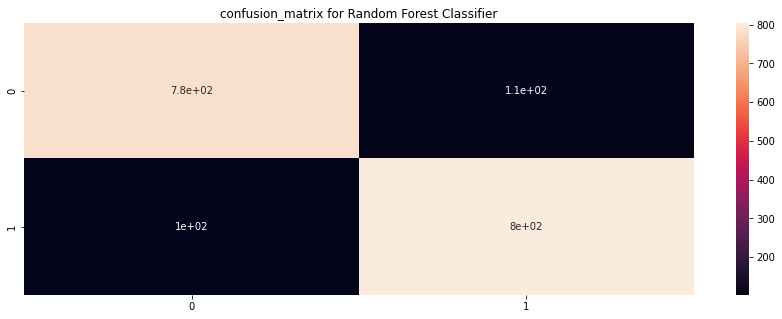

In [82]:
# let's visualize the confusion matrix:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

plt.title("confusion_matrix for Random Forest Classifier")

# Predictions

In [111]:
# saving the model
joblib.dump(final_model, './models/model.joblib')
joblib.dump(scaler, './models/scaler.joblib')

['./models/scaler.joblib']

In [112]:
# loading the model
final_model = joblib.load('./models/model.joblib')
scaler = joblib.load('./models/scaler.joblib')

In [113]:
sample = [[0, 46, 2.0,	np.sqrt(20.0), 0.0, 0, 0,	0, np.log(291.0), np.log(112.0), np.log(23.84), np.log(80.0), np.log(84.0)]]

scaled_sample = scaler.transform(sample)
final_model.predict(scaled_sample)

array([1])